In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00      1055

    accuracy                           1.00      1717
   macro avg       1.00      1.00      1.00      1717
weighted avg       1.00      1.00      1.00      1717



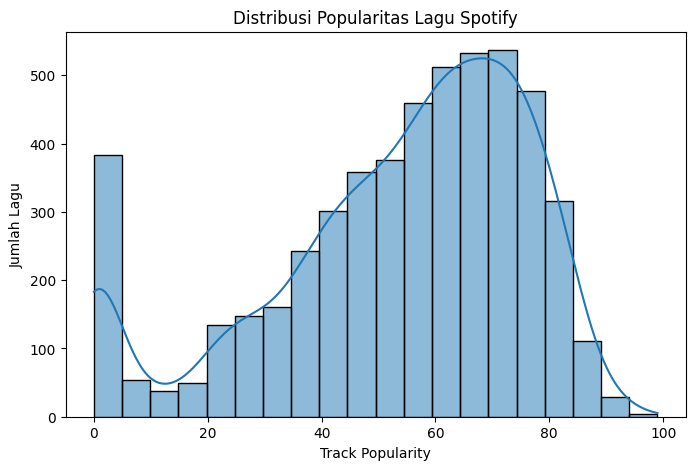

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['track_popularity'], bins=20, kde=True)
plt.title('Distribusi Popularitas Lagu Spotify')
plt.xlabel('Track Popularity')
plt.ylabel('Jumlah Lagu')
plt.show()


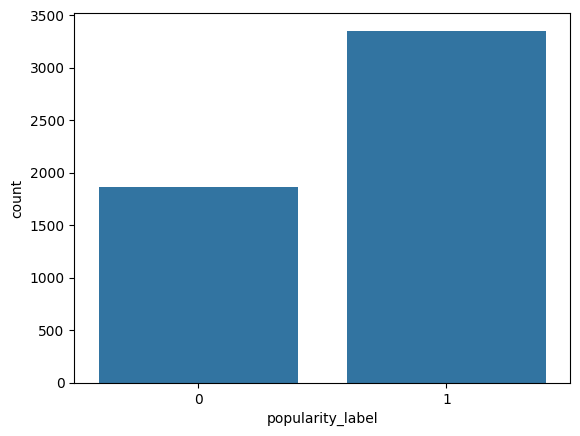

In [ ]:
sns.countplot(x='popularity_label', data=df)
plt.show()


In [ ]:
df.describe()


,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min,popularity_label
count,5221.000000,5221.000000,5221.000000,5.221000e+03,5221.000000,5221.000000,5221.000000
mean,6.465237,53.555258,74.588776,3.383704e+07,15.893124,3.564999,0.642406
std,6.324842,22.987208,17.178821,4.472907e+07,13.101610,1.133062,0.479338
min,1.000000,0.000000,2.000000,4.000000e+00,1.000000,0.140000,0.000000
25%,1.000000,41.000000,63.000000,1.303279e+06,10.000000,2.900000,0.000000
50%,5.000000,59.000000,79.000000,1.096042e+07,14.000000,3.510000,1.000000
75%,10.000000,71.000000,88.000000,4.771699e+07,19.000000,4.080000,1.000000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000,1.000000


In [ ]:
train_size = len(X_train)
test_size = len(X_test)

tabel_split = pd.DataFrame({
    "Jenis Data": ["Data Latih (Train)", "Data Uji (Test)", "Total"],
    "Jumlah Data": [train_size, test_size, train_size + test_size],
    "Persentase": ["80%", "20%", "100%"]
})

tabel_split


,Jenis Data,Jumlah Data,Persentase
0,Data Latih (Train),6865,80%
1,Data Uji (Test),1717,20%
2,Total,8582,100%


In [ ]:
import pandas as pd

tabel_preprocessing = pd.DataFrame({
    "Keterangan": [
        "Jumlah Record",
        "Jumlah Atribut",
        "Missing Value",
        "Target Label"
    ],
    "Sebelum Preprocessing": [
        jumlah_awal[0],
        jumlah_awal[1],
        "Ada",
        "Belum ada"
    ],
    "Sesudah Preprocessing": [
        jumlah_setelah[0],
        jumlah_setelah[1],
        "Tidak ada",
        "popularity_label"
    ]
})

tabel_preprocessing


,Keterangan,Sebelum Preprocessing,Sesudah Preprocessing
0,Jumlah Record,8582,5221
1,Jumlah Atribut,16,16
2,Missing Value,Ada,Tidak ada
3,Target Label,Belum ada,popularity_label


In [ ]:
jumlah_setelah = df.shape
jumlah_setelah


(5221, 16)

In [ ]:
df = df.dropna()


In [ ]:
jumlah_awal = df.shape
jumlah_awal


(8582, 16)

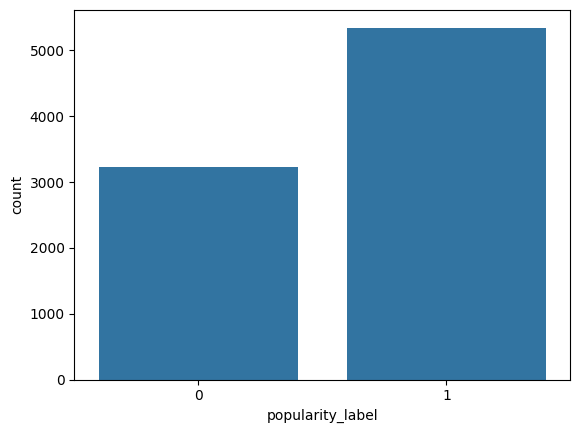

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='popularity_label', data=df)
plt.show()


In [ ]:
hasil_prediksi['Prediksi_Popularitas'] = hasil_prediksi['Prediksi_Popularitas'].map(
    {1: 'Populer', 0: 'Tidak Populer'}
)
hasil_prediksi['Asli'] = hasil_prediksi['Asli'].map(
    {1: 'Populer', 0: 'Tidak Populer'}
)

hasil_prediksi.head(10)


,Track,Prediksi_Popularitas,Asli
0,4951,Tidak Populer,Tidak Populer
1,4825,Populer,Populer
2,6741,Populer,Populer
3,222,Tidak Populer,Tidak Populer
4,5746,Populer,Populer
5,6832,Populer,Populer
6,1084,Populer,Populer
7,2758,Tidak Populer,Tidak Populer
8,6459,Tidak Populer,Tidak Populer
9,3459,Tidak Populer,Tidak Populer


In [ ]:
hasil_prediksi = pd.DataFrame({
    'Track': X_test.index,
    'Prediksi_Popularitas': y_pred,
    'Asli': y_test.values
})

hasil_prediksi.head(10)


,Track,Prediksi_Popularitas,Asli
0,4951,0,0
1,4825,1,1
2,6741,1,1
3,222,0,0
4,5746,1,1
5,6832,1,1
6,1084,1,1
7,2758,0,0
8,6459,0,0
9,3459,0,0


In [ ]:
df[['track_name', 'track_popularity', 'popularity_label']].head(10)



,track_name,track_popularity,popularity_label
0,Trippy Mane (ft. Project Pat),0,0
1,OMG!,0,0
2,Hard 2 Find,4,0
3,Still Get Like That (ft. Project Pat & Starrah),30,0
4,ride me like a harley,0,0
5,BLEED,2,0
6,Te Procuro na Cidade,20,0
7,come closer,27,0
8,Cupido Vagabundo,16,0
9,LET’S GO!,33,0


In [ ]:
df[['track_name', 'artist_name', 'track_popularity']].head(10)


,track_name,artist_name,track_popularity
0,Trippy Mane (ft. Project Pat),Diplo,0
1,OMG!,Yelawolf,0
2,Hard 2 Find,Riff Raff,4
3,Still Get Like That (ft. Project Pat & Starrah),Diplo,30
4,ride me like a harley,Rumelis,0
5,BLEED,Minzie,2
6,Te Procuro na Cidade,AZERDK,20
7,come closer,Rumelis,27
8,Cupido Vagabundo,Toni dos Anjos,16
9,LET’S GO!,PsychoYP,33


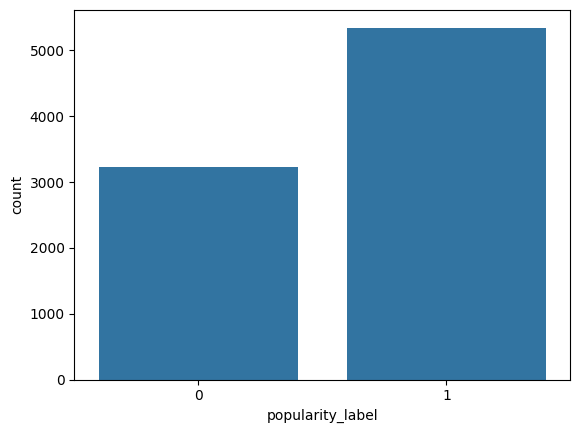

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='popularity_label', data=df)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00      1055

    accuracy                           1.00      1717
   macro avg       1.00      1.00      1.00      1717
weighted avg       1.00      1.00      1.00      1717



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
X = df.select_dtypes(include=['int64', 'float64'])
y = df['popularity_label']


In [ ]:
df['popularity_label'] = df['track_popularity'].apply(
    lambda x: 1 if x >= 50 else 0
)


In [ ]:
df.isnull().sum()


,0
track_id,0
track_name,0
track_number,0
track_popularity,0
explicit,0
artist_name,3
artist_popularity,0
artist_followers,0
artist_genres,3361
album_id,0


In [ ]:
df.shape


(8582, 16)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/spotify_data clean.csv")
df.head()


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
